### Example

In [1]:
from pyod.utils.auto_model_selector import AutoModelSelector
from pyod.utils.data import generate_data
import os
from dotenv import load_dotenv

load_dotenv()

False

In [4]:
api_key = os.getenv("API_KEY")

contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# Generate sample data
X_train, X_test, y_train, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=5,
                  contamination=contamination,
                  random_state=42)
selector = AutoModelSelector(dataset=X_train, api_key=api_key)

#get the selected model and reason for selecting it
selected_model, reason = selector.model_auto_select()

#initialize the top model
clf = selector.get_top_clf()

clf.fit(X_train)  #train model
y_train_scores = clf.decision_scores_  # Outlier scores for training data
y_test_scores = clf.decision_function(X_test)  # Outlier scores for test data

{
  "Data size": ["medium"],
  "Data type": ["tabular data"],
  "Domain": ["others"],
  "Characteristics": ["imbalanced data"],
  "Additional requirements": ["low memory"]
}
The top model is:  LUNAR
Reason to choose this model:  LUNAR is well-suited for tabular data and explicitly handles imbalanced data, which is a significant characteristic of the dataset. Its capability for short training times and scalability aligns well with the medium data size requirement. Although it may have high memory usage as a weakness, it excels in handling sparse data and does not suffer from low memory issues, making it the most fitting choice among the options provided.


### Comparison （with addition notes）

In [ ]:
from scipy.io import loadmat
import os


def get_datasets(data_dir='data'):
    dataset_list = []

    if not os.path.exists(data_dir):
        print(f"The folder '{data_dir}' does not exist.")
        return dataset_list

    # return all .mat files in the folder
    return [os.path.join(data_dir, f) for f in os.listdir(data_dir) if
            f.endswith('.mat')]


In [14]:
datasets_with_additional_notes = {
    'data/pima.mat': 'Healthcare dataset containing tabular data of clinical measurements for diabetes patients.',
    'data/cardio.mat': 'Healthcare dataset comprising tabular data of clinical measurements for heart disease patients.',
    'data/mnist.mat': 'Image dataset consisting of grayscale images of handwritten digits.',
    'data/arrhythmia.mat': 'Healthcare dataset with tabular data of clinical measurements for arrhythmia patients.',
    'data/pendigits.mat': 'Time series dataset featuring pen-based input sequences of handwritten digits.',
    'data/shuttle.mat': 'Sensor dataset recording tabular data of spacecraft state information.',
    'data/letter.mat': 'Image dataset containing images of handwritten letters.',
    'data/musk.mat': 'Chemical dataset providing tabular data of molecular features.',
    'data/vowels.mat': 'Time series dataset with phonetic features of vowel sounds.',
    'data/optdigits.mat': 'Image dataset for optical character recognition of handwritten digits.',
    'data/satellite.mat': 'Remote sensing dataset with pixel features from satellite images.',
    'data/lympho.mat': 'Healthcare dataset involving tabular data of clinical measurements for lymphatic diseases.',
    'data/ionosphere.mat': 'Radar dataset containing tabular data of radar echo signals from the ionosphere.',
    'data/wbc.mat': 'Healthcare dataset with tabular data of nuclear features of breast cancer cells.',
    'data/glass.mat': 'Material dataset containing tabular data of chemical compositions of glass types.',
    'data/satimage-2.mat': 'Remote sensing dataset with pixel features from satellite images.',
    'data/vertebral.mat': 'Healthcare dataset involving tabular data of clinical measurements for vertebral diseases.'
}



In [15]:
def select_model_datasets(
        output_file='with_note_selection_results/output.json', repeat=1,
        api_key=OPENAI_API_KEY):
    """
    Runs auto-selection for all datasets and store the results into a json file

    Parameters:
        - output_file: output file location
        - repeat: number of times to run for each dataset
        - api_key: API key for the LLM
    
    Prints each selected model and reason and store them
    """
    #dataset_paths = get_datasets()
    datasets = {}

    for dataset_path, description in datasets_with_additional_notes.items():
        mat = loadmat(dataset_path)
        selector = AutoModelSelector(dataset=mat['X'], api_key=api_key,
                                     additional_notes=description)
        result_list = []

        dataset_name = os.path.splitext(os.path.basename(dataset_path))[0]
        print(f"Current dataset: {dataset_name}")
        print('\n')

        for i in range(repeat):
            print(f"Repeat: {i + 1}")
            selected_model, reason = selector.model_auto_select()
            if selected_model != None and reason != None:
                result_list.append(
                    {"selected_model": selected_model, "reason": reason})

        datasets[dataset_name] = result_list
        print('\n\n')

    # Write to JSON file
    with open(output_file, "w") as json_file:
        json.dump(datasets, json_file, indent=4)

    return


In [19]:
select_model_datasets(repeat=50)

Current dataset: pima


Repeat: 1
{
  "Data size": ["medium"],
  "Data type": ["tabular data"],
  "Domain": ["medical"],
  "Characteristics": ["noisy data", "imbalanced data"],
  "Additional requirements": ["CPU", "low memory"]
}
The top model is:  AE1SVM
Reason to choose this model:  AE1SVM is the most suitable model because it supports tabular data, excels in handling imbalanced data, and performs well in the medical domain. It is also designed for high-dimensional datasets and short training time, which aligns with the dataset's characteristics of noisy and medium data size. Although it requires high memory, its other strengths outweigh this weakness given the CPU and low memory constraints.
Repeat: 2
The top model is:  AE1SVM
Reason to choose this model:  AE1SVM is suitable for the given dataset due to its strengths in handling tabular and medical data, which matches our domain requirements. Furthermore, it is well-suited for imbalanced data, despite the dataset being noisy, which 

In [20]:
import pandas as pd
import json
import os

prn_df = pd.read_csv('prn_df.csv')
roc_df = pd.read_csv('roc_df.csv')
time_df = pd.read_csv('time_df.csv')

In [21]:
def load_experiment_results(results_dir='with_note_selection_results'):
    experiment_results = {}
    result_files = [f for f in os.listdir(results_dir) if f.endswith('.json')]

    for result_file in result_files:
        condition = os.path.splitext(result_file)[0]
        file_path = os.path.join(results_dir, result_file)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        experiment_results[condition] = data
        print(f"Loaded results for condition '{condition}'")

    return experiment_results


experiment_results = load_experiment_results()

Loaded results for condition 'output'


In [ ]:
import re
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model_list = ['MO-GAAL', 'AutoEncoder', 'SO-GAAL', 'VAE', 'AnoGAN',
              'Deep SVDD', 'ALAD', 'AE1SVM', 'DevNet', 'LUNAR']

for condition, results in experiment_results.items():
    print(f"\nCondition: {condition}")
    model_counter = Counter()
    for dataset_name, responses in results.items():
        for response in responses:
            answer = response['selected_model']
            cleaned_answer = re.sub(r'[^a-zA-Z\s]', '', answer)
            cleaned_answer_upper = cleaned_answer.upper()
            for model in model_list:
                model_cleaned = re.sub(r'[^a-zA-Z]', '', model).upper()
                if model_cleaned in cleaned_answer_upper.replace(' ', ''):
                    model_counter[model] += 1


pima
tops: ['AutoEncoder', 'LUNAR', 'DeepSVDD', 'AnoGAN', 'VAE']
selected:  ['AE1SVM', 'AE1SVM', 'AE1SVM', 'AutoEncoder', 'AE1SVM', 'AE1SVM', 'ALAD', 'AE1SVM', 'AE1SVM', 'AutoEncoder', 'AE1SVM', 'ALAD', 'LUNAR', 'AE1SVM', 'LUNAR', 'AE1SVM', 'AE1SVM', 'VAE', 'AE1SVM', 'AE1SVM', 'AE1SVM', 'LUNAR', 'VAE', 'AE1SVM', 'ALAD', 'AE1SVM', 'AE1SVM', 'SO-GAAL', 'VAE', 'ALAD', 'ALAD', 'ALAD', 'LUNAR', 'ALAD', 'AE1SVM', 'ALAD', 'AE1SVM', 'AE1SVM', 'SO-GAAL', 'AE1SVM', 'AE1SVM', 'AE1SVM', 'LUNAR', 'AE1SVM', 'AutoEncoder', 'LUNAR', 'VAE', 'ALAD', 'ALAD', 'AE1SVM']
cardio
tops: ['VAE', 'DeepSVDD', 'AE1SVM', 'AnoGAN', 'AutoEncoder']
selected:  ['AE1SVM', 'AutoEncoder', 'AE1SVM', 'AE1SVM', 'VAE', 'AE1SVM', 'AE1SVM', 'Deep SVDD', 'AutoEncoder', 'LUNAR', 'VAE', 'AutoEncoder', 'VAE', 'AutoEncoder', 'AE1SVM', 'AutoEncoder', 'VAE', 'AutoEncoder', 'AE1SVM', 'AE1SVM', 'AutoEncoder', 'LUNAR', 'AutoEncoder', 'AutoEncoder', 'AE1SVM', 'AE1SVM', 'AE1SVM', 'Deep SVDD', 'VAE', 'AutoEncoder', 'VAE', 'AutoEncoder', 'Au

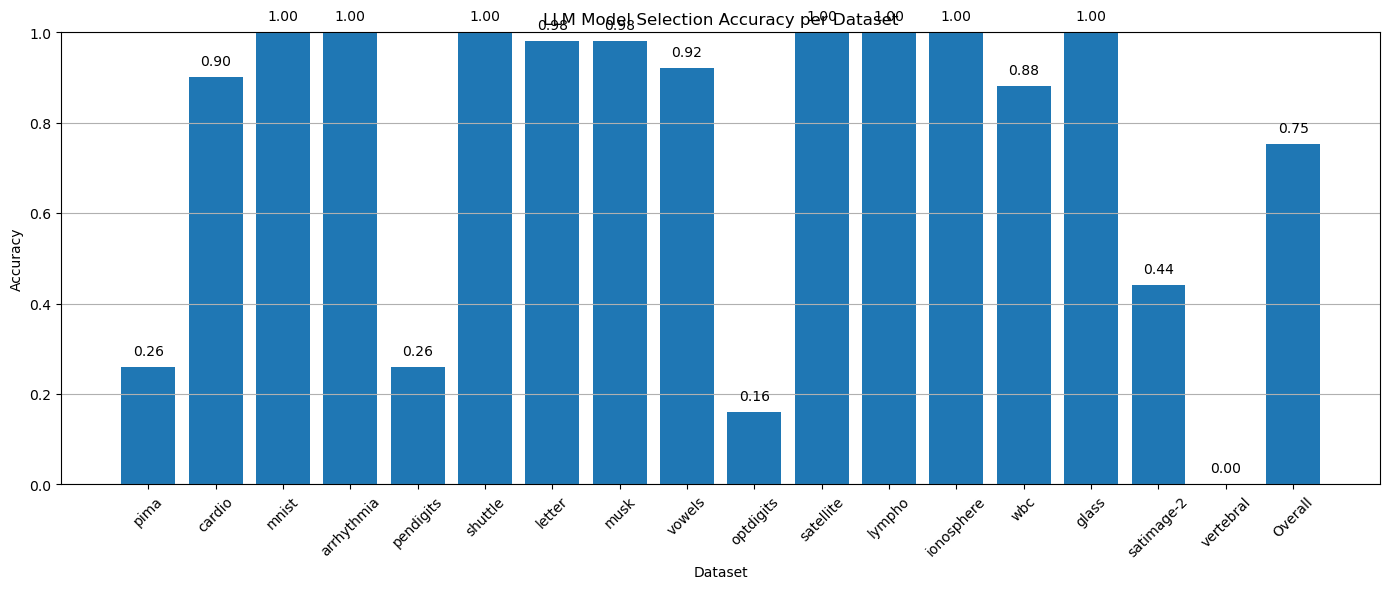

In [23]:
top_n = 5
# Extract the list of model columns
model_columns = roc_df.columns[4:]
top5_models_per_dataset = {}

for index, row in roc_df.iterrows():
    dataset = row['Data']
    # Get the ROC values for the models
    model_scores = row[model_columns]
    top5_models = model_scores.sort_values(ascending=False).head(
        top_n + 1).index.tolist()
    top5_models.remove('Outlier Perc')
    top5_models_per_dataset[dataset] = top5_models

llm_selected_models = experiment_results['output']

# Extract the selected models for each dataset
selected_models_per_dataset = {}

for dataset, selections in llm_selected_models.items():
    selected_models = [entry['selected_model'] for entry in selections]
    selected_models_per_dataset[dataset] = selected_models

# Evaluate accuracy
correct_counts = {}
total_correct = 0
total_selections = 0

for dataset, selected_models in selected_models_per_dataset.items():
    top5 = top5_models_per_dataset.get(dataset, [])
    print(dataset)
    print("tops:", top5)
    print('selected: ', selected_models)
    correct = sum([1 for model in selected_models if model in top5])
    total = len(selected_models)
    accuracy = correct / total if total > 0 else 0
    correct_counts[dataset] = {'correct': correct, 'total': total,
                               'accuracy': accuracy}
    # Accumulate total correct and total selections
    total_correct += correct
    total_selections += total

# Calculate overall accuracy
overall_accuracy = total_correct / total_selections if total_selections > 0 else 0
print(f"\nOverall Accuracy: {overall_accuracy:.2f}")

# Display the evaluation results per dataset
print("\nLLM's Selection Accuracy per Dataset:")
for dataset, counts in correct_counts.items():
    print(
        f"{dataset}: {counts['correct']} out of {counts['total']} correct, Accuracy: {counts['accuracy']:.2f}")

# Step 4: Visualize the Results

# Convert the results into a DataFrame
accuracy_df = pd.DataFrame.from_dict(correct_counts, orient='index')

# Reset index to turn the dataset names into a column
accuracy_df.reset_index(inplace=True)
accuracy_df.rename(columns={'index': 'Dataset'}, inplace=True)

# Add overall accuracy to the DataFrame using pd.concat
overall_row = pd.DataFrame({
    'Dataset': ['Overall'],
    'correct': [total_correct],
    'total': [total_selections],
    'accuracy': [overall_accuracy]
})

# Concatenate the overall accuracy row to the accuracy DataFrame
accuracy_df = pd.concat([accuracy_df, overall_row], ignore_index=True)

# Plot the accuracy per dataset
plt.figure(figsize=(14, 6))
bars = plt.bar(accuracy_df['Dataset'], accuracy_df['accuracy'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('LLM Model Selection Accuracy per Dataset')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')

# Add accuracy labels on top of each bar
for bar, acc in zip(bars, accuracy_df['accuracy']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f'{acc:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Comparison (without additional notes)

In [24]:
def select_model_datasets(
        output_file='without_note_selection_results/output.json', repeat=1,
        api_key=OPENAI_API_KEY):
    """
    Runs auto-selection for all datasets and store the results into a json file

    Parameters:
        - output_file: output file location
        - repeat: number of times to run for each dataset
        - api_key: API key for the LLM
    
    Prints each selected model and reason and store them
    """
    dataset_paths = get_datasets()
    datasets = {}

    for dataset_path in dataset_paths:
        mat = loadmat(dataset_path)
        selector = AutoModelSelector(dataset=mat['X'], api_key=api_key)
        result_list = []

        dataset_name = os.path.splitext(os.path.basename(dataset_path))[0]
        print(f"Current dataset: {dataset_name}")
        print('\n')

        for i in range(repeat):
            print(f"Repeat: {i + 1}")
            selected_model, reason = selector.model_auto_select()
            if selected_model != None and reason != None:
                result_list.append(
                    {"selected_model": selected_model, "reason": reason})

        datasets[dataset_name] = result_list
        print('\n\n')

    # Write to JSON file
    with open(output_file, "w") as json_file:
        json.dump(datasets, json_file, indent=4)

    return

In [28]:
select_model_datasets(repeat=50)

Current dataset: pima


Repeat: 1
{
  "Data size": ["medium"],
  "Data type": ["tabular data"],
  "Domain": ["others"],
  "Characteristics": ["imbalanced data", "noisy data"],
  "Additional requirements": ["low memory"]
}
The top model is:  LUNAR
Reason to choose this model:  LUNAR is selected because it handles tabular and imbalanced data well, which aligns with the dataset properties. Although it is weak with noisy data, the low memory requirement and ability to scale to larger datasets make it a suitable choice given the medium data size and low memory requirement of the dataset. LUNAR also has a short training time, which is advantageous. Other models either require high memory or have significant weaknesses in dealing with tabular or imbalanced data.
Repeat: 2
The top model is:  LUNAR
Reason to choose this model:  LUNAR is chosen because it effectively handles tabular and imbalanced data, which are primary characteristics of the dataset. It also operates well under low memory cons

Loaded results for condition 'output'

Condition: output
Model recommendation counts:
  MO-GAAL: 0
  AutoEncoder: 155
  SO-GAAL: 30
  VAE: 385
  AnoGAN: 0
  Deep SVDD: 1
  ALAD: 19
  AE1SVM: 60
  DevNet: 0
  LUNAR: 200


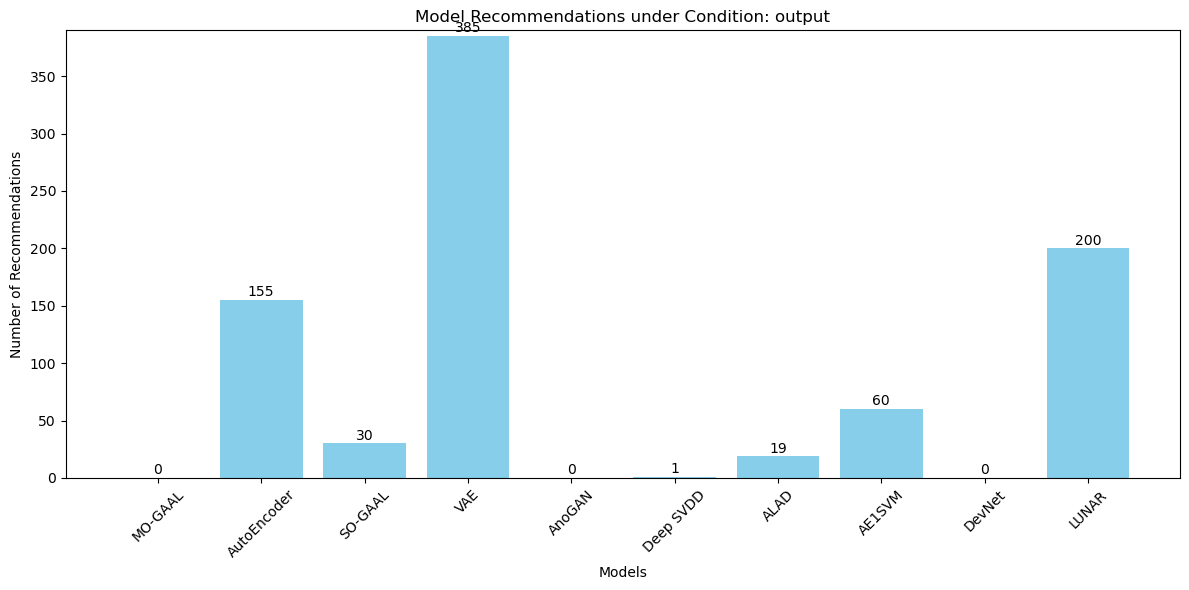

pima
tops: ['AutoEncoder', 'LUNAR', 'DeepSVDD', 'AnoGAN', 'VAE']
selected:  ['LUNAR', 'LUNAR', 'AE1SVM', 'AE1SVM', 'LUNAR', 'VAE', 'LUNAR', 'LUNAR', 'LUNAR', 'ALAD', 'LUNAR', 'ALAD', 'VAE', 'ALAD', 'ALAD', 'LUNAR', 'ALAD', 'AE1SVM', 'LUNAR', 'LUNAR', 'SO-GAAL', 'LUNAR', 'AE1SVM', 'LUNAR', 'LUNAR', 'ALAD', 'AE1SVM', 'AE1SVM', 'AE1SVM', 'LUNAR', 'AE1SVM', 'LUNAR', 'AE1SVM', 'LUNAR', 'AE1SVM', 'LUNAR', 'AE1SVM', 'AE1SVM', 'LUNAR', 'AE1SVM', 'LUNAR', 'LUNAR', 'ALAD', 'LUNAR', 'LUNAR', 'SO-GAAL', 'LUNAR', 'LUNAR', 'LUNAR', 'AE1SVM']
cardio
tops: ['VAE', 'DeepSVDD', 'AE1SVM', 'AnoGAN', 'AutoEncoder']
selected:  ['LUNAR', 'LUNAR', 'SO-GAAL', 'SO-GAAL', 'SO-GAAL', 'LUNAR', 'SO-GAAL', 'SO-GAAL', 'SO-GAAL', 'LUNAR', 'SO-GAAL', 'SO-GAAL', 'LUNAR', 'LUNAR', 'SO-GAAL', 'LUNAR', 'SO-GAAL', 'LUNAR', 'SO-GAAL', 'SO-GAAL', 'SO-GAAL', 'AE1SVM', 'SO-GAAL', 'LUNAR', 'LUNAR', 'SO-GAAL', 'SO-GAAL', 'LUNAR', 'SO-GAAL', 'SO-GAAL', 'LUNAR', 'LUNAR', 'SO-GAAL', 'SO-GAAL', 'LUNAR', 'SO-GAAL', 'SO-GAAL', 'LUNAR',

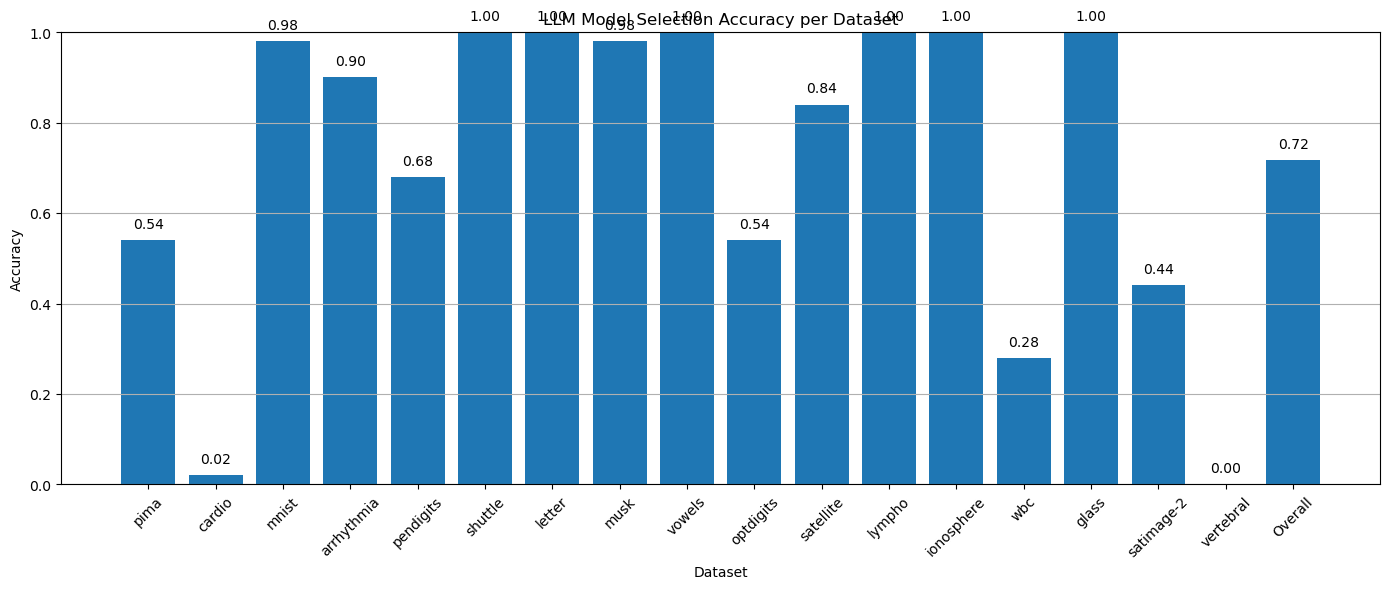

In [29]:
import pandas as pd
import json
import os

prn_df = pd.read_csv('prn_df.csv')
roc_df = pd.read_csv('roc_df.csv')
time_df = pd.read_csv('time_df.csv')


def load_experiment_results(results_dir='without_note_selection_results'):
    experiment_results = {}
    result_files = [f for f in os.listdir(results_dir) if f.endswith('.json')]

    for result_file in result_files:
        condition = os.path.splitext(result_file)[0]
        file_path = os.path.join(results_dir, result_file)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        experiment_results[condition] = data
        print(f"Loaded results for condition '{condition}'")

    return experiment_results


experiment_results = load_experiment_results()
import re
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model_list = ['MO-GAAL', 'AutoEncoder', 'SO-GAAL', 'VAE', 'AnoGAN',
              'Deep SVDD', 'ALAD', 'AE1SVM', 'DevNet', 'LUNAR']

for condition, results in experiment_results.items():
    print(f"\nCondition: {condition}")
    model_counter = Counter()
    for dataset_name, responses in results.items():
        for response in responses:
            answer = response['selected_model']
            cleaned_answer = re.sub(r'[^a-zA-Z\s]', '', answer)
            cleaned_answer_upper = cleaned_answer.upper()
            for model in model_list:
                model_cleaned = re.sub(r'[^a-zA-Z]', '', model).upper()
                if model_cleaned in cleaned_answer_upper.replace(' ', ''):
                    model_counter[model] += 1
    print("Model recommendation counts:")
    for model in model_list:
        count = model_counter.get(model, 0)
        print(f"  {model}: {count}")

    models = model_list
    counts = [model_counter.get(model, 0) for model in models]

top_n = 5
# Extract the list of model columns
model_columns = roc_df.columns[4:]
top5_models_per_dataset = {}

for index, row in roc_df.iterrows():
    dataset = row['Data']
    # Get the ROC values for the models
    model_scores = row[model_columns]
    # Sort the models based on ROC values in descending order
    top5_models = model_scores.sort_values(ascending=False).head(
        top_n + 1).index.tolist()
    top5_models.remove('Outlier Perc')
    top5_models_per_dataset[dataset] = top5_models

llm_selected_models = experiment_results['output']

# Extract the selected models for each dataset
selected_models_per_dataset = {}

for dataset, selections in llm_selected_models.items():
    selected_models = [entry['selected_model'] for entry in selections]
    selected_models_per_dataset[dataset] = selected_models

# Evaluate accuracy
correct_counts = {}
total_correct = 0
total_selections = 0

for dataset, selected_models in selected_models_per_dataset.items():
    top5 = top5_models_per_dataset.get(dataset, [])
    print(dataset)
    print("tops:", top5)
    print('selected: ', selected_models)
    correct = sum([1 for model in selected_models if model in top5])
    total = len(selected_models)
    accuracy = correct / total if total > 0 else 0
    correct_counts[dataset] = {'correct': correct, 'total': total,
                               'accuracy': accuracy}
    # Accumulate total correct and total selections
    total_correct += correct
    total_selections += total

# Calculate overall accuracy
overall_accuracy = total_correct / total_selections if total_selections > 0 else 0
print(f"\nOverall Accuracy: {overall_accuracy:.2f}")

# Display the evaluation results per dataset
print("\nLLM's Selection Accuracy per Dataset:")
for dataset, counts in correct_counts.items():
    print(
        f"{dataset}: {counts['correct']} out of {counts['total']} correct, Accuracy: {counts['accuracy']:.2f}")

# Step 4: Visualize the Results

accuracy_df = pd.DataFrame.from_dict(correct_counts, orient='index')
accuracy_df.reset_index(inplace=True)
accuracy_df.rename(columns={'index': 'Dataset'}, inplace=True)
overall_row = pd.DataFrame({
    'Dataset': ['Overall'],
    'correct': [total_correct],
    'total': [total_selections],
    'accuracy': [overall_accuracy]
})
accuracy_df = pd.concat([accuracy_df, overall_row], ignore_index=True)
plt.figure(figsize=(14, 6))
bars = plt.bar(accuracy_df['Dataset'], accuracy_df['accuracy'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('LLM Model Selection Accuracy per Dataset')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')

# Add accuracy labels on top of each bar
for bar, acc in zip(bars, accuracy_df['accuracy']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f'{acc:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Baseline
- avg performamce of all models on each datset 
- mode model of each dataset selected by autoselector's performance (with note)
- mode model of each dataset selected by autoselector's performance(without note)
- autoencoder
- lunar


In [66]:
# 1. Avg performamce of all models on each datset
model_columns = [
    'MO-GAAL', 'SO-GAAL', 'AutoEncoder', 'VAE', 'AnoGAN',
    'DeepSVDD', 'ALAD', 'AE1SVM', 'DevNet', 'LUNAR'
]
roc_df = pd.read_csv('roc_df.csv')
roc_df['Average_Performance'] = roc_df[model_columns].mean(axis=1)
roc_df

,Unnamed: 0,Data,#Samples,# Dimensions,Outlier Perc,MO-GAAL,SO-GAAL,AutoEncoder,VAE,AnoGAN,DeepSVDD,ALAD,AE1SVM,DevNet,LUNAR,Average_Performance
0,0,arrhythmia,452,274,14.6018,0.6160,0.5661,0.8116,0.8176,0.7946,0.7554,0.4232,0.8176,0.2110,0.8284,0.66415
1,0,cardio,1831,21,9.6122,0.5603,0.7255,0.7847,0.9615,0.8004,0.9340,0.6025,0.9125,0.0503,0.5704,0.69021
2,0,glass,214,9,4.2056,0.4247,0.3975,0.5901,0.6099,0.6765,0.4000,0.2667,0.6864,0.5580,0.7926,0.54024
3,0,ionosphere,351,33,35.8974,0.6751,0.5908,0.7851,0.7675,0.6600,0.7535,0.5046,0.7730,0.6828,0.9156,0.71080
4,0,letter,1600,32,6.2500,0.3489,0.3074,0.8087,0.5884,0.5223,0.5133,0.4811,0.5883,0.6991,0.9057,0.57632
5,0,lympho,148,18,4.0541,0.5263,0.3918,0.9825,0.9825,0.9825,0.8421,0.6374,0.9649,0.0234,0.9357,0.72691
6,0,mnist,7603,100,9.2069,0.6122,0.6926,0.8567,0.9002,0.6688,0.7207,0.4786,0.8721,0.4000,0.7411,0.69430
7,0,musk,3062,166,3.1679,0.5686,0.4388,0.8853,1.0000,0.8060,0.9505,0.3772,1.0000,0.9987,0.7666,0.77917
8,0,optdigits,5216,64,2.8758,0.6552,0.4641,0.5124,0.5074,0.8159,0.5199,0.4940,0.4455,0.7033,0.4836,0.56013
9,0,pendigits,6870,16,2.2707,0.6974,0.5114,0.6687,0.9273,0.8492,0.7824,0.5690,0.9097,0.1047,0.6973,0.67171


In [67]:
# mode model's performance (with note)

with open('with_note_selection_results/output.json', 'r',
          encoding='utf-8') as file:
    result_with_note = json.load(file)

with_note_modes = {}

for dataset_name, models in result_with_note.items():
    selected_models = [item['selected_model'] for item in models]

    if selected_models:
        model_counts = Counter(selected_models)
        most_common = model_counts.most_common(1)
        if most_common:
            mode_model, count = most_common[0]
            with_note_modes[dataset_name] = mode_model
        else:
            with_note_modes[dataset_name] = None
    else:
        with_note_modes[dataset_name] = None
for dataset, mode_model in with_note_modes.items():
    print(f"Dataset: '{dataset}'; Mode: {mode_model}")

Dataset: 'pima'; Mode: AE1SVM
Dataset: 'cardio'; Mode: AutoEncoder
Dataset: 'mnist'; Mode: VAE
Dataset: 'arrhythmia'; Mode: AE1SVM
Dataset: 'pendigits'; Mode: Deep SVDD
Dataset: 'shuttle'; Mode: AutoEncoder
Dataset: 'letter'; Mode: VAE
Dataset: 'musk'; Mode: AutoEncoder
Dataset: 'vowels'; Mode: AutoEncoder
Dataset: 'optdigits'; Mode: VAE
Dataset: 'satellite'; Mode: AutoEncoder
Dataset: 'lympho'; Mode: AE1SVM
Dataset: 'ionosphere'; Mode: LUNAR
Dataset: 'wbc'; Mode: VAE
Dataset: 'glass'; Mode: LUNAR
Dataset: 'satimage-2'; Mode: AutoEncoder
Dataset: 'vertebral'; Mode: VAE


In [68]:
# mode model's performance (without note)

with open('without_note_selection_results/output.json', 'r',
          encoding='utf-8') as file:
    result_without_note = json.load(file)

without_note_modes = {}

for dataset_name, models in result_without_note.items():
    selected_models = [item['selected_model'] for item in models]

    if selected_models:
        model_counts = Counter(selected_models)
        most_common = model_counts.most_common(1)
        if most_common:
            mode_model, count = most_common[0]
            without_note_modes[dataset_name] = mode_model
        else:
            without_note_modes[dataset_name] = None
    else:
        without_note_modes[dataset_name] = None
for dataset, mode_model in without_note_modes.items():
    print(f"Dataset: '{dataset}'; Mode: {mode_model}")

Dataset: 'pima'; Mode: LUNAR
Dataset: 'cardio'; Mode: SO-GAAL
Dataset: 'mnist'; Mode: AutoEncoder
Dataset: 'arrhythmia'; Mode: VAE
Dataset: 'pendigits'; Mode: VAE
Dataset: 'shuttle'; Mode: VAE
Dataset: 'letter'; Mode: VAE
Dataset: 'musk'; Mode: AE1SVM
Dataset: 'vowels'; Mode: VAE
Dataset: 'optdigits'; Mode: AutoEncoder
Dataset: 'satellite'; Mode: VAE
Dataset: 'lympho'; Mode: LUNAR
Dataset: 'ionosphere'; Mode: VAE
Dataset: 'wbc'; Mode: LUNAR
Dataset: 'glass'; Mode: LUNAR
Dataset: 'satimage-2'; Mode: VAE
Dataset: 'vertebral'; Mode: VAE


In [69]:
roc_df['without_note_modes'] = roc_df['Data'].map(without_note_modes)
roc_df['with_note_modes'] = roc_df['Data'].map(with_note_modes)

roc_df['without note'] = roc_df.apply(
    lambda row: row[row['without_note_modes']] if row[
                                                      'without_note_modes'] in roc_df.columns else None,
    axis=1
)

roc_df['with note'] = roc_df.apply(
    lambda row: row[row['with_note_modes']] if row[
                                                   'with_note_modes'] in roc_df.columns else None,
    axis=1
)


In [86]:
# Combine all into one

result_with_baseline = roc_df[
    ["Data", "AutoEncoder", 'LUNAR', 'without note', 'with note',
     'Average_Performance']]
result_with_baseline.to_csv('result_with_baseline.csv')

In [87]:
result_with_baseline

,Data,AutoEncoder,LUNAR,without note,with note,Average_Performance
0,arrhythmia,0.8116,0.8284,0.8176,0.8176,0.66415
1,cardio,0.7847,0.5704,0.7255,0.7847,0.69021
2,glass,0.5901,0.7926,0.7926,0.7926,0.54024
3,ionosphere,0.7851,0.9156,0.7675,0.9156,0.71080
4,letter,0.8087,0.9057,0.5884,0.5884,0.57632
5,lympho,0.9825,0.9357,0.9357,0.9649,0.72691
6,mnist,0.8567,0.7411,0.8567,0.9002,0.69430
7,musk,0.8853,0.7666,1.0000,0.8853,0.77917
8,optdigits,0.5124,0.4836,0.5124,0.5074,0.56013
9,pendigits,0.6687,0.6973,0.9273,0.7824,0.67171


In [88]:
result_with_baseline.describe()

,AutoEncoder,LUNAR,without note,with note,Average_Performance
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.771776,0.737359,0.790771,0.783253,0.657980
std,0.179621,0.183630,0.168978,0.171241,0.105573
min,0.324000,0.255200,0.417200,0.417200,0.466010
25%,0.668700,0.641000,0.725500,0.643100,0.576320
50%,0.808700,0.766600,0.792600,0.817600,0.664150
75%,0.885300,0.904200,0.927300,0.915600,0.710800
max,0.993900,0.946000,1.000000,0.993900,0.884270
